# Logistic Regression

## Agenda

1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Compare logistic regression with other models

## Part 1: Predicting a Continuous Response

In [1]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})

In [2]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1,0


Pretend that we want to predict **ri**, and our only feature is **al**. How would we do it using machine learning? We would frame it as a regression problem, and use a linear regression model with **al** as the only feature and **ri** as the response.

How would we **visualize** this model? Create a scatter plot with **al** on the x-axis and **ri** on the y-axis, and draw the line of best fit.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


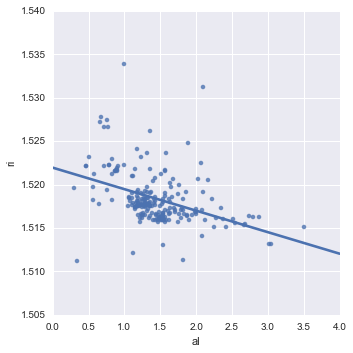

In [4]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

If we had an **al** value of 2, what would we predict for **ri**? Roughly 1.517.



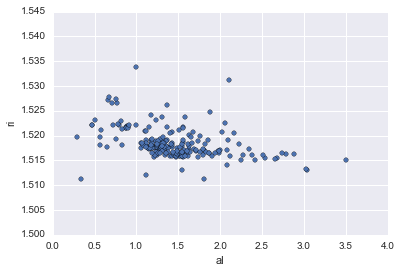

In [5]:
# Exercise: Draw the scatter plot using Pandas.
















# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

In [6]:
# fit a linear regression model to predict ri from al
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [7]:
# look at the coefficients to get the equation for the line, but then how do you plot the line?
print linreg.intercept_
print linreg.coef_

1.52194533024
[-0.00247761]


In [8]:
# you could make predictions for arbitrary points, and then plot a line connecting them
print linreg.predict(1)
print linreg.predict(2)
print linreg.predict(3)

[ 1.51946772]
[ 1.51699012]
[ 1.51451251]


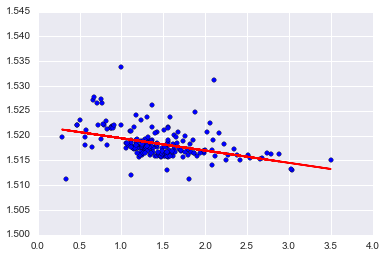

In [9]:
# or you could make predictions for all values of X, and then plot those predictions connected by a line
ri_pred = linreg.predict(X)

# draw regression line with matplotlib and pandas
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, ri_pred, color='red')

### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [10]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 1.51699012])

In [11]:
# examine coefficient for al
pd.DataFrame(zip(feature_cols, linreg.coef_), columns=['feature', 'coef'])

,feature,coef
0,al,-0.002478


In [ ]:
# Note that we can't use a cross_val_score if we want to investigate variable relationships

**Interpretation:** A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [12]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([ 1.51451251])

## Part 2: Predicting a Categorical Response

Let's change our task, so that we're predicting **assorted** using **al**. Let's visualize the relationship to figure out how to do this:

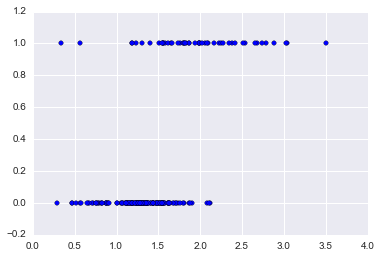

In [13]:
plt.scatter(glass.al, glass.assorted)

Let's draw a **regression line**, like we did before:

In [14]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
linreg.fit(X, y)
assorted_pred = linreg.predict(X)

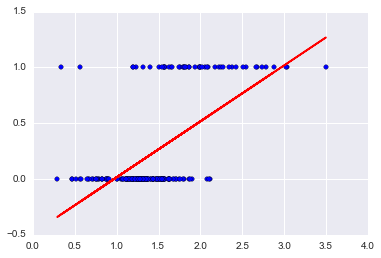

In [15]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred, color='red')

If **al=3**, what class do we predict for assorted? **1**

If **al=1.5**, what class do we predict for assorted? **0**

So, we predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

So, we'll say that if **assorted_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [16]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

In [17]:
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

In [18]:
# examine the predictions
assorted_pred[:10]

array([ 0.06545853,  0.19576455,  0.28597641,  0.16068216,  0.13562331,
        0.32607057,  0.08550561,  0.04039968,  0.20077632,  0.19576455])

In [19]:
# transform predictions to 1 or 0
assorted_pred_class = np.where(assorted_pred >= 0.5, 1, 0)
assorted_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1])

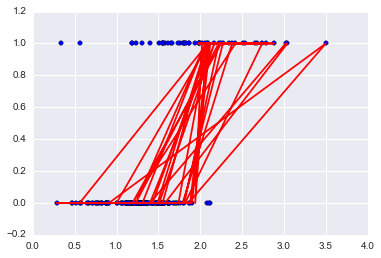

In [20]:
# plot the class predictions
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

What went wrong? This is a line plot, and it connects points in the order they are found. Let's sort the DataFrame by "al" to fix this:

In [21]:
# add predicted class to DataFrame
glass['assorted_pred_class'] = assorted_pred_class

# sort DataFrame by al
glass.sort('al', inplace=True)

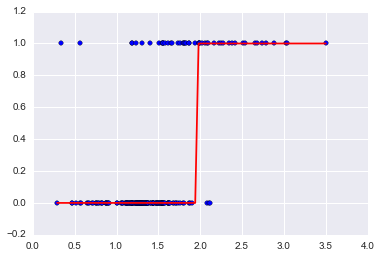

In [22]:
# plot the class predictions again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_class, color='red')

## Part 3: Using Logistic Regression Instead

Logistic regression can do what we just did, but better..

In [23]:
# fit a linear regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

In [24]:
# print the class predictions
assorted_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

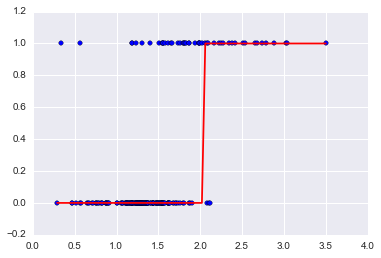

In [25]:
# plot the class predictions
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [29]:
# store the predicted probabilites of class 1
assorted_pred_prob = logreg.predict_proba(X)[:, 1]
print assorted_pred_prob

[ 0.02806625  0.03094319  0.03982038  0.03982038  0.0430124   0.04734677
  0.04734677  0.04919427  0.05621243  0.05728888  0.05838467  0.06296723
  0.06416424  0.06788354  0.06788354  0.07047312  0.07180189  0.07315374
  0.07735104  0.0787985   0.0787985   0.08483896  0.08483896  0.08641341
  0.08801427  0.08964188  0.08964188  0.09129657  0.10746348  0.10746348
  0.11749519  0.11959648  0.12173017  0.12389656  0.12832872  0.13059509
  0.13059509  0.13059509  0.13289538  0.13289538  0.13289538  0.13759889
  0.13759889  0.14000267  0.14000267  0.14244152  0.14244152  0.14491569
  0.14491569  0.14742545  0.14742545  0.14742545  0.14997105  0.14997105
  0.14997105  0.14997105  0.14997105  0.14997105  0.15255274  0.15517077
  0.15517077  0.15782535  0.16051672  0.16051672  0.16051672  0.16051672
  0.16051672  0.16324508  0.16324508  0.16601065  0.16601065  0.16601065
  0.16881363  0.16881363  0.16881363  0.17165418  0.17165418  0.17165418
  0.1745325   0.1745325   0.1745325   0.1745325   0

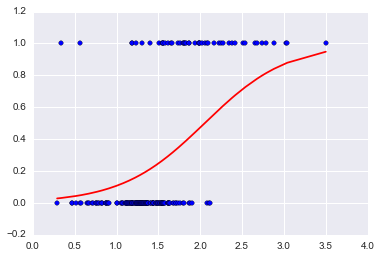

In [27]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color='red')

In [30]:
# examine some example predictions
print logreg.predict_proba(1)
print logreg.predict_proba(2)
print logreg.predict_proba(3)

[[ 0.89253652  0.10746348]]
[[ 0.52645662  0.47354338]]
[[ 0.12953623  0.87046377]]


What is this? The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## Part 4: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

In [31]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [32]:
# exponential function: e^1
e = np.exp(1)
e

2.7182818284590451

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [33]:
# time needed to grow 1 unit to 2.718 units
np.log(e)

1.0

It is also the **inverse** of the exponential function:

In [34]:
np.log(np.exp(5))

5.0

In [35]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## Part 5: What is Logistic Regression?

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

Notes:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data.

## Part 6: Interpreting Logistic Regression Coefficients

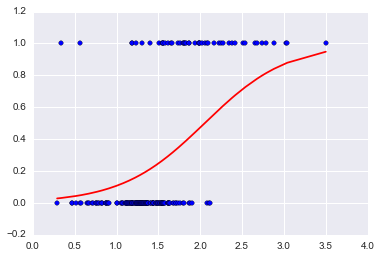

In [36]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color='red')

In [37]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_ * 2
logodds

array([[-0.10592543]])

In [38]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([[ 0.89949172]])

In [39]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([[ 0.47354338]])

In [40]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.47354338])

In [41]:
# examine the coefficient for al
pd.DataFrame(zip(feature_cols, logreg.coef_), columns=['feature', 'coef'])

,feature,coef
0,al,[2.01099096417]


**Interpretation:** A 1 unit increase in 'al' is associated with a 2.0109 unit increase in the log-odds of 'assorted'.

In [42]:
# increasing al by 1 (so that al=3) increases the log-odds by 2.0109

# the -0.10592543 is the logodds we calculated a few cells ago for al=2
# I am stepping through the equation by one "unit" of al

logodds = -0.10592543 + 2.0109
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.87045351351387434

In [43]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.87046377])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [44]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

**Interpretation:** For an 'al' value of 0, the log-odds of 'assorted' is -4.127

In [45]:
# convert log-odds to probability
# Probability of assorted is low if al = 0
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.01586095])

That makes sense from the plot above, because the probability of assorted=1 should be very low for such a low 'al' value.

![](images/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

## Part 7: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features
- Can't automatically learn feature interactions

## Bonus: Confusion Matrix



In [46]:
from sklearn import metrics
preds = logreg.predict(X)
print metrics.confusion_matrix(y, preds)
# Note that we can't make this martix using cross_val_score so a train_test_split has to do!

[[160   3]
 [ 31  20]]


##Top Left: True Negatives <Br>
##Top Right False Negatives <Br>
##Bottom Left: False Negatives <br>
##Bottom Right: True Positives <br>

**Exercise** Calculate:
Accuracy
Sensitivity
Specificity
Precision by hand



<br><br><br><br><br><br><br><br><br><br><br><br><br>







#### Accuracy    = (157 + 28) / 214       == .8644
#### Sensitivity (Recall) =  28        / (23 + 28) == .5490
#### Specificity =  157       / (157 + 6) == .9631
#### Precision =  28       / (28 + 6) == .823

In [47]:
print metrics.classification_report(y, preds)

             precision    recall  f1-score   support

          0       0.84      0.98      0.90       163
          1       0.87      0.39      0.54        51

avg / total       0.85      0.84      0.82       214



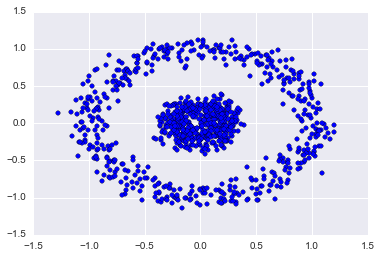

In [48]:
# MORE DATA

# Logistic Regression is a high bias low variance model that is also non-parametric

from sklearn.datasets import make_circles
from sklearn.cross_validation import cross_val_score
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1])

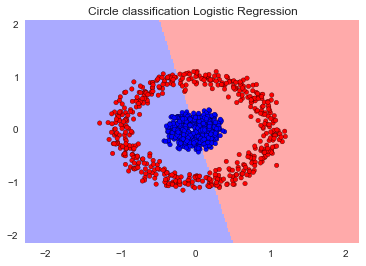

In [49]:
# It has a linear decision boundary, IE the shape is draws between classes are lines!

from matplotlib.colors import ListedColormap
import numpy as np

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(circles_X, circles_y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Circle classification Logistic Regression")

plt.show()

In [50]:
logreg = LogisticRegression()
cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()
# lame

0.48899999999999999

In [51]:
from sklearn.neighbors import KNeighborsClassifier  # compare to knn
knn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn, circles_X, circles_y, cv=5, scoring='accuracy').mean()
# not as lame, remember?

1.0

In [52]:
from sklearn import datasets

# new dataset, handwritten digits!
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

9

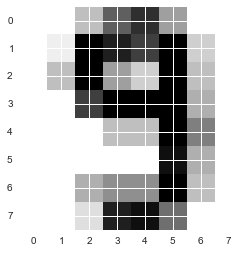

In [53]:
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
# the number 9


digits.target[-5]

In [54]:
digits.data.shape
# 1,797 observations, 64 features (8 x 8 image)

(1797, 64)

In [55]:
digits_X, digits_y = digits.data, digits.target

In [56]:
logreg = LogisticRegression()
cross_val_score(logreg, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.92101881133607011

In [57]:
# compare to KNN
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.9627899114966898

In [ ]:
# Thought Exercise, why would KNN potentially be a better model than logsitci regression
# for handwriting?

In [ ]:
# OK so wait, when should we use Logistic Regression?

In [58]:
# Using dataset of a 1978 survey conducted to measure likliehood of women to perform extramarital affairs
# http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

import statsmodels.api as sm
affairs_df = sm.datasets.fair.load_pandas().data

In [60]:
affairs_df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32.0,9.0,3.0,3,17,2,5,0.111111
1,3,27.0,13.0,3.0,1,14,3,4,3.230769
2,4,22.0,2.5,0.0,1,16,3,5,1.400000
3,4,37.0,16.5,4.0,3,16,5,5,0.727273
4,5,27.0,9.0,1.0,1,14,3,4,4.666666
5,4,27.0,9.0,0.0,2,14,3,4,4.666666
6,5,37.0,23.0,5.5,2,12,5,4,0.852174
7,5,37.0,23.0,5.5,2,12,2,3,1.826086
8,3,22.0,2.5,0.0,2,12,3,3,4.799999
9,3,27.0,6.0,0.0,1,16,3,5,1.333333


In [61]:
affairs_df['affair_binary'] = (affairs_df['affairs'] > 0)

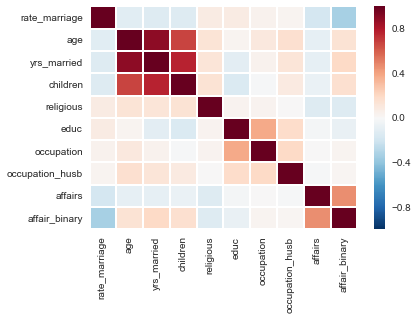

In [62]:
sns.heatmap(affairs_df.corr())

In [ ]:
affairs_df.corr()
# Obviously affairs will correlate to affair_binary but what else?






# It seems children, yrs_married, rate_married, and age all correlate to affair_binary
# Remember correlations are NOT the single way to identify which features to use
# Correlations only give us a number determining how linearlly correlated the variables are
# We may find another variable that affects affairs by evaluating the coefficients of our LR

In [63]:
affairs_X = affairs_df.drop(['affairs', 'affair_binary'], axis=1)
affairs_y = affairs_df['affair_binary']

In [72]:
model = LogisticRegression()
from sklearn.cross_validation import cross_val_score
# check the accuracy on the training set
scores = cross_val_score(model, affairs_X, affairs_y, cv=10)
print scores
print scores.mean()

# Looks pretty good

[ 0.72413793  0.70062696  0.73510972  0.71069182  0.71069182  0.73113208
  0.72798742  0.7091195   0.75        0.75157233]
0.72510695767


In [66]:
# Explore individual features that make the biggest impact
# religious, yrs_married, and occupation. But one of these variables doesn't quite make sense right?
pd.DataFrame(zip(affairs_X.columns, np.transpose(model.coef_)))

AttributeError: 'LogisticRegression' object has no attribute 'coef'

In [ ]:
# Dummy Variables:

# Encoding qualitiative (nominal) data using separate columns (see slides for linear regression for more)

<img src="images/dummy.png">

In [68]:
occuptation_dummies = pd.get_dummies(affairs_df['occupation'], prefix='occ_').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1)
affairs_df.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,occ__2.0,occ__3.0,occ__4.0,occ__5.0,occ__6.0
0,3,32,9.0,3,3,17,2,5,0.111111,True,1,0,0,0,0
1,3,27,13.0,3,1,14,3,4,3.230769,True,0,1,0,0,0
2,4,22,2.5,0,1,16,3,5,1.400000,True,0,1,0,0,0
3,4,37,16.5,4,3,16,5,5,0.727273,True,0,0,0,1,0
4,5,27,9.0,1,1,14,3,4,4.666666,True,0,1,0,0,0


In [69]:
occuptation_dummies = pd.get_dummies(affairs_df['occupation_husb'], prefix='occ_husb_').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1)
affairs_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,occ__2.0,occ__3.0,occ__4.0,occ__5.0,occ__6.0,occ_husb__2.0,occ_husb__3.0,occ_husb__4.0,occ_husb__5.0,occ_husb__6.0
0,3,32,9.0,3,3,17,2,5,0.111111,True,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3,4,3.230769,True,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,3,5,1.400000,True,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,5,5,0.727273,True,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,3,4,4.666666,True,0,1,0,0,0,0,0,1,0,0


In [70]:
# remove appropiate columns for feature set
affairs_X = affairs_df.drop(['affairs', 'affair_binary', 'occupation', 'occupation_husb'], axis=1)
affairs_y = affairs_df['affair_binary']

In [71]:
model = LogisticRegression()
model = model.fit(affairs_X, affairs_y)

# check the accuracy on the training set
model.score(affairs_X, affairs_y)

0.72588752748978946

In [73]:
pd.DataFrame(zip(affairs_X.columns, np.transpose(model.coef_)), columns = ['features', 'coef'])

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
# compare KNN to LR

In [74]:
knn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn, affairs_X, affairs_y, cv=5, scoring='accuracy').mean()

0.68630248906529234

In [75]:
logreg = LogisticRegression()
cross_val_score(logreg, affairs_X, affairs_y, cv=5, scoring='accuracy').mean()

0.72558005785768587

In [ ]:
# When we are investigating individual correlations between features and categorical responses
# Logistic regression has a good shot :)

# KNN relies on the entire n-space to make predictions while LR uses the model parameters to focus
# on one or more particular features

# LR has concept of "importance" of features

In [ ]:
# Final Thought Experiment

# Why might KNN (a kind of look alike model) not perform well here?